In [1]:
!pip install pennylane-sf --upgrade

Requirement already up-to-date: pennylane-sf in /usr/local/lib/python3.6/dist-packages (0.8.0)


In [0]:
import numpy as np
import pennylane as qml
from pennylane import expval, var

In [0]:
dev = qml.device("default.qubit", wires=2)

def ansatz(params, wires):
    
    qml.RY(params[0], wires=0)
    qml.RY(params[1], wires=1)
    
    qml.CNOT(wires=[0,1])
    
    qml.RY(params[2], wires=0)
    qml.RY(params[3], wires=1)

In [0]:
alpha = 0.4
beta = 0.2
coeffs = [alpha, alpha, beta]

obs_list = [
    qml.PauliZ(0) @ qml.Identity(1),
    qml.Identity(0) @ qml.PauliZ(1),
    qml.PauliX(0) @ qml.PauliX(1)
]

qnodes = qml.map(ansatz, obs_list, dev, measure='expval')
expval  = qml.dot(coeffs, qnodes)

In [0]:
step_size = 0.05
max_iterations = 400
conv_tol = 1e-06

print_freq = 20

initial_params = np.array([-0.2,-0.2,0,0])

In [25]:
params = initial_params
prev_energy = expval(params)
qng_energies_block = []

for n in range(max_iterations):
    
    grad_cost = qml.grad(expval, argnum=[0])
    grad_at_point = [float(i) for i in grad_cost(params)[0]] 
    
    params = params - step_size * np.dot(
                np.linalg.pinv(qnodes[0].metric_tensor([params])), 
                grad_at_point)

    energy = expval(params)
    qng_energies_block.append(energy)
    
    conv = np.abs(energy - prev_energy)

    if n % print_freq == 0:
        print('Iteration = {:},  Energy = {:.8f} Ha,  Convergence parameter = {'
              ':.8f} Ha'.format(n, energy, conv))

    if conv <= conv_tol:
        qng_block_steps = n
        break

    prev_energy = energy

print()
print('Final convergence parameter = {:.8f} Ha'.format(conv))
print('Final value of the ground-state energy = {:.8f} Ha'.format(energy))
print()
print('Final circuit parameters = \n', params)
print('Number of iterations = ', qng_block_steps)

Iteration = 0,  Energy = 0.70579155 Ha,  Convergence parameter = 0.03071341 Ha
Iteration = 20,  Energy = -0.81912764 Ha,  Convergence parameter = 0.00201111 Ha
Iteration = 40,  Energy = -0.82454651 Ha,  Convergence parameter = 0.00001366 Ha

Final convergence parameter = 0.00000096 Ha
Final value of the ground-state energy = -0.82461564 Ha

Final circuit parameters = 
 [-1.62068919 -1.32517619  1.51679689 -1.55267923]
Number of iterations =  56


In [26]:
params = initial_params
prev_energy = expval(params)
qng_energies_diag = []

for n in range(max_iterations):
    
    grad_cost = qml.grad(expval, argnum=[0])
    grad_at_point = [float(i) for i in grad_cost(params)[0]] 
    
    params = params - step_size * np.dot(np.linalg.pinv(qnodes[0].metric_tensor([params], diag_approx=True)),
                                         grad_at_point)

    energy = expval(params)
    qng_energies_diag.append(energy)
    
    conv = np.abs(energy - prev_energy)

    if n % print_freq == 0:
        print('Iteration = {:},  Energy = {:.8f} Ha,  Convergence parameter = {'
              ':.8f} Ha'.format(n, energy, conv))

    if conv <= conv_tol:
        qng_diag_steps = n
        break

    prev_energy = energy

print()
print('Final convergence parameter = {:.8f} Ha'.format(conv))
print('Final value of the ground-state energy = {:.8f} Ha'.format(energy))
print()
print('Final circuit parameters = \n', params)
print('Number of iterations = ', qng_diag_steps)

Iteration = 0,  Energy = 0.70631920 Ha,  Convergence parameter = 0.03018576 Ha
Iteration = 20,  Energy = -0.77461737 Ha,  Convergence parameter = 0.01072920 Ha
Iteration = 40,  Energy = -0.82165071 Ha,  Convergence parameter = 0.00035153 Ha
Iteration = 60,  Energy = -0.82421542 Ha,  Convergence parameter = 0.00003943 Ha
Iteration = 80,  Energy = -0.82455353 Ha,  Convergence parameter = 0.00000619 Ha
Iteration = 100,  Energy = -0.82460913 Ha,  Convergence parameter = 0.00000107 Ha

Final convergence parameter = 0.00000098 Ha
Final value of the ground-state energy = -0.82461012 Ha

Final circuit parameters = 
 [-2.7245423  -0.91500545  0.34081939 -0.95760241]
Number of iterations =  101


In [27]:
params = initial_params
prev_energy = expval(params)
vanilla_energies = []

for n in range(max_iterations):
    
    grad_cost = qml.grad(expval, argnum=[0])
    grad_at_point = [float(i) for i in grad_cost(params)[0]] 
    
    params = params - step_size * np.dot(step_size, grad_at_point)

    energy = expval(params)
    vanilla_energies.append(energy)
    
    conv = np.abs(energy - prev_energy)

    if n % print_freq == 0:
        print('Iteration = {:},  Energy = {:.8f} Ha,  Convergence parameter = {'
              ':.8f} Ha'.format(n, energy, conv))

    if conv <= conv_tol:
        n = vanilla_steps
        break

    prev_energy = energy

print()
print('Final convergence parameter = {:.8f} Ha'.format(conv))
print('Final value of the ground-state energy = {:.8f} Ha'.format(energy))
print()
print('Final circuit parameters = \n', params)
print('Number of iterations = ', n)

Iteration = 0,  Energy = 0.73615402 Ha,  Convergence parameter = 0.00035095 Ha
Iteration = 20,  Energy = 0.72884421 Ha,  Convergence parameter = 0.00037896 Ha
Iteration = 40,  Energy = 0.72095359 Ha,  Convergence parameter = 0.00040894 Ha
Iteration = 60,  Energy = 0.71244170 Ha,  Convergence parameter = 0.00044099 Ha
Iteration = 80,  Energy = 0.70326637 Ha,  Convergence parameter = 0.00047519 Ha
Iteration = 100,  Energy = 0.69338388 Ha,  Convergence parameter = 0.00051161 Ha
Iteration = 120,  Energy = 0.68274914 Ha,  Convergence parameter = 0.00055031 Ha
Iteration = 140,  Energy = 0.67131600 Ha,  Convergence parameter = 0.00059134 Ha
Iteration = 160,  Energy = 0.65903751 Ha,  Convergence parameter = 0.00063473 Ha
Iteration = 180,  Energy = 0.64586639 Ha,  Convergence parameter = 0.00068049 Ha
Iteration = 200,  Energy = 0.63175551 Ha,  Convergence parameter = 0.00072858 Ha
Iteration = 220,  Energy = 0.61665844 Ha,  Convergence parameter = 0.00077898 Ha
Iteration = 240,  Energy = 0.60053

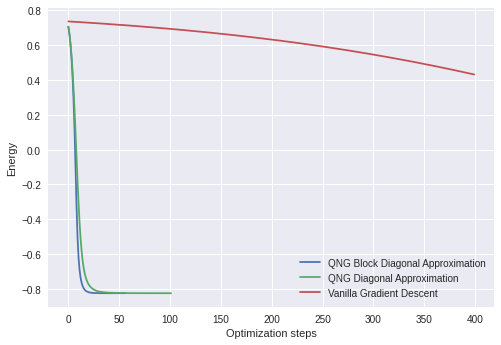

In [29]:
from matplotlib import pyplot as plt

plt.style.use("seaborn")
plt.plot(qng_energies_block, label="QNG Block Diagonal Approximation")
plt.plot(qng_energies_diag, label="QNG Diagonal Approximation")
plt.plot(vanilla_energies, label="Vanilla Gradient Descent")

plt.ylabel("Energy")
plt.xlabel("Optimization steps")
plt.legend()
plt.show()

In [30]:
print('Steps to reach convergence \n')

print('QNG Block Diagonal Approximation: {:}'.format(qng_block_steps))
print('QNG Diagonal Approximation: {:}'.format(qng_diag_steps))
print('Vanilla Gradient Descent: {:}'.format(n))

Steps to reach convergence 

QNG Block Diagonal Approximation: 56
QNG Diagonal Approximation: 101
Vanilla Gradient Descent: 399
